## Семинар 7. Numpy


1. Многомерный массив

    1.1. Что такое массив? Размерность массива
    
    1.2. Импорт модуля `numpy`
    
    1.3. Создание массивов
    
    1.4. Атрибуты массива
    
    1.5. Типы элементов массива
    
    1.6. Создание массивов функцями Numpy
    
    1.7. Случайные распределения


2. Операции с массивами

    2.1. Операторы
    
    2.2. Операции между массивами разных размеров (`broadcasting`)
    
    2.2. Выбор: индексирование, срезы

## Массив

**Массив** - это структура данных, хранящая набор однотипных значений, идентифицируемых по индексу или набору индексов, принимающих целые значения из некоторого диапазона.

**Размерность массива** - это количество индексов, необходимое для однозначной адресации элемента в рамках массива

**Преимущества массивов**

- константная вычислительная сложность доступа к любому элементу массива;
- произвольность доступа.


## Основной класс - `ndarray`

Основной класс в `numpy` - `ndarray`, многомерный массив.

`ndarray` имеет все преимущества массива, а также обеспечивает быструю обработку без использования относительно медленных циклов Python.

Далее работа будет с объектами этого класса.

## Импорт `numpy`

`import numpy as np`

`np` - синоним имени модуля, пространство имен, ссылка для доступа к компонентам модуля


## Способы создания массива

- `np.array(obj, dtype, ...)` - преобразование из списка, кортежа, генератора, другого массива, ...
    - `obj` - объект, который нужно преобразовать
    - `dtype` - тип элемента массива
- функции `numpy`
- операции с массивами

In [3]:
import numpy as np

C:\Users\stasb\Anaconda3\envs\p38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\stasb\Anaconda3\envs\p38\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\stasb\Anaconda3\envs\p38\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\stasb\Anaconda3\envs\p38\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# одномерный массив из списка и кортежа
np.array([1, 2, 3]), np.array((1, 2, 3))

(array([1, 2, 3]), array([1, 2, 3]))

In [3]:
# преобразование из генератора
np.array(range(13))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [4]:
# преобразование из генератора списка
np.array([x**2 for x in range(13)])

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121, 144])

In [5]:
# двумерный массив из списка списков
np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [6]:
# трехмерный массив из списка списков списков
np.array([
    [[1], [2], [3]],
    [[4], [5], [6]],
    [[7], [8], [9]]
])

array([[[1],
        [2],
        [3]],

       [[4],
        [5],
        [6]],

       [[7],
        [8],
        [9]]])

## Атрибуты массива

- `arr.shape` - размеры массива = его форма (кортеж)
- `arr.dtype` - тип элемента массива
- `arr.ndim` - количество измерений массива (целое число > 0)
- `arr.strides` - шаги в байтах для перехода к следующему элементу измерения (кортеж)
- `arr.nbytes` - размер занимаемой памяти в байтах


In [7]:
arr = np.array(range(6))
arr

array([0, 1, 2, 3, 4, 5])

In [8]:
arr.ndim, arr.shape, arr.strides, arr.nbytes

(1, (6,), (4,), 24)

In [9]:
arr = np.array([[col*6+row for col in range(6)] for row in range(6)])
arr

array([[ 0,  6, 12, 18, 24, 30],
       [ 1,  7, 13, 19, 25, 31],
       [ 2,  8, 14, 20, 26, 32],
       [ 3,  9, 15, 21, 27, 33],
       [ 4, 10, 16, 22, 28, 34],
       [ 5, 11, 17, 23, 29, 35]])

In [10]:
arr.ndim, arr.shape, arr.strides, arr.nbytes

(2, (6, 6), (24, 4), 144)

## Типы элементов массива

Встроенные типы `Python`:

- `int`, `bool`, `float`, `complex`, `str`, ...

Типы `numpy`:

- `np.int0`, `np.int8`, `np.int16`, `np.int32`, `np.int64`
- `np.float`, `np.float16`, `np.float32`, `np.float64`
- `np.complex`, `np.complex64`, `np.complex128`

Также можно задать тип, эквивалентный `struct` в языке Си, т.е. упорядоченный набор из разнотипных элементов, занимающих жестко фиксированное количество байт.

In [11]:
# массив с элементами разных типов
for dtype in (int, float, bool):
    print('%r' % np.array([0, 1, 2, 3], dtype=dtype))

array([0, 1, 2, 3])
array([0., 1., 2., 3.])
array([False,  True,  True,  True])


In [12]:
# массив с элементами разных типов
for dtype in (np.int0, np.int8, np.int16, np.int32):
    arr = np.array([0, 1, 2, 3], dtype=dtype)
    print(dtype)
    print('%r' % arr)
    print('memory size:', arr.nbytes, end='\n'*2)

<class 'numpy.int64'>
array([0, 1, 2, 3], dtype=int64)
memory size: 32

<class 'numpy.int8'>
array([0, 1, 2, 3], dtype=int8)
memory size: 4

<class 'numpy.int16'>
array([0, 1, 2, 3], dtype=int16)
memory size: 8

<class 'numpy.int32'>
array([0, 1, 2, 3])
memory size: 16



## Задание

Создать массивы и вывести на экран:
- содержимое
- форму
- размер занимаемой памяти

1. одномерный массив, содержащий действительные числа $\pi, \frac{\pi}{2}, \frac{\pi}{4}, \frac{\pi}{8}, \frac{\pi}{16}, ..., \frac{\pi}{1024}$
2. одномерный массив, содержащий константу `True`, если число делится на 5, иначе - `False` для чисел 10, ..., 100.
3. двумерный массив, содержащий комплексные числа $x + iy$, где $x = 1.5k, y=2.5m, k=0,...,10, m=0,...,10$


In [41]:
import numpy as np

In [42]:
np.array([np.pi/2**i for i in range(11)])

array([3.14159265e+00, 1.57079633e+00, 7.85398163e-01, 3.92699082e-01,
       1.96349541e-01, 9.81747704e-02, 4.90873852e-02, 2.45436926e-02,
       1.22718463e-02, 6.13592315e-03, 3.06796158e-03])

In [48]:
np.pi/2**np.arange(11)

array([3.14159265e+00, 1.57079633e+00, 7.85398163e-01, 3.92699082e-01,
       1.96349541e-01, 9.81747704e-02, 4.90873852e-02, 2.45436926e-02,
       1.22718463e-02, 6.13592315e-03, 3.06796158e-03])

## Функции `numpy`

## Создать массив из одинаковых элементов

Создать массив размером `shape` и заполнить его:

- `np.zeros(shape, ...)` - нулями
- `np.ones(shape, ...)` - единицами
- `np.full(shape, fill_value, ...)` - `fill_value`


Создать массив такого же размера, как и `array` и заполнить его:

- `np.zeros_like(array, ...)` - нулями
- `np.ones_like(array, ...)` - единицами
- `np.full_like(array, fill_value...)` - `fill_value`

Создать незаполненный массив:

- `np.empty(shape, ...)` - размера `shape`
- `np.empty_like(array, ...)` - размера как и `array`



In [49]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [50]:
np.ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [53]:
arr2 = np.ones((10, 10))
arr2.dtype

dtype('float64')

In [52]:
np.empty_like(arr2, dtype=int)

array([[          0,           0,           0,           0,           0,
                  0, -1956006704,       32767,          46,           0],
       [ 1670138160,         452,  1670138224,         452,  1670138544,
                452,  1670147328,         452,  1670138608,         452],
       [ 1670147408,         452,  1670147488,         452,  1670138736,
                452,  1670147568,         452,  1670138672,         452],
       [ 1670138800,         452,  1670147648,         452,  1670138864,
                452,  1670147728,         452,  1670147808,         452],
       [ 1670138928,         452,  1670138992,         452,  1670147888,
                452,  1670139056,         452,  1670147968,         452],
       [ 1670139120,         452,  1670139184,         452,  1670139248,
                452,  1670139312,         452,  1670139376,         452],
       [ 1670152240,         452,  1670139440,         452,  1670139504,
                452,  1670139568,         452

## Создать массив из последовательности значений

- `np.arange(start, stop, step, ...)` - аналог `range`, но работает и с действительными числами
- `np.linspace(start, stop, num, ...)` - распределить равномерно `num` точек на отрезке `[start, stop]`

In [120]:
np.arange(13.5, 36, 2.5)

array([13.5, 16. , 18.5, 21. , 23.5, 26. , 28.5, 31. , 33.5])

In [17]:
# 11 равноотстоящих друг от друга значений на отрезке [0, 10]
np.linspace(0, 10, 11)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [18]:
# 9 равноотстоящих друг от друга значений на отрезке [0, 10] и шаг между ними
np.linspace(0, 10, 9, retstep=True)

(array([ 0.  ,  1.25,  2.5 ,  3.75,  5.  ,  6.25,  7.5 ,  8.75, 10.  ]), 1.25)

In [11]:
!pip show numpy

Name: numpy
Version: 1.21.2
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: None
License: BSD
Location: c:\users\stasb\anaconda3\envs\p38\lib\site-packages
Requires: 
Required-by: pandas, numba, matplotlib, visual-statistics, xarray, vispy, tifffile, spiceypy, scipy, scikit-learn, scikit-image, PyWavelets, pyvista, orbipy, ncls, mkl-random, mkl-fft, meshio, ipygany, ipycanvas, imageio, holoviews, datashape, datashader, bokeh, altair


In [ ]:
!pip install -U --user numpy

## Создать массив из псевдослучайной последовательности

Для этой цели существует подмодуль `random`.

Начиная с версии `numpy 1.17.0` принцип работы с генераторами псевдослучайных последовательностей изменился.

Простой способ - положиться на генератор по-умолчанию:

`rng = np.random.default_rng()`

- `rng.uniform(low=0.0, high=1.0, size=None)` - создать массив размера `size` и заполнить случайной последовательностью с равномерным распределением на `[low, high)`


- `rng.normal(loc=0.0, scale=1.0, size=None)` - создать массив размера `size` и заполнить случайной последовательностью с нормальным  распределением (среднее = `loc`, стандартное отклонение = `scale`)


- `rng.choice(a, size)` - выбрать `size` случайных элементов из `a`

...

In [40]:
rng = np.random.default_rng()
rng

Generator(PCG64) at 0x1FD3544A400

In [12]:
print(*(x for x in dir(rng) if not x.startswith('_')), sep=', ')

beta, binomial, bit_generator, bytes, chisquare, choice, dirichlet, exponential, f, gamma, geometric, gumbel, hypergeometric, integers, laplace, logistic, lognormal, logseries, multinomial, multivariate_hypergeometric, multivariate_normal, negative_binomial, noncentral_chisquare, noncentral_f, normal, pareto, permutation, poisson, power, random, rayleigh, shuffle, standard_cauchy, standard_exponential, standard_gamma, standard_normal, standard_t, triangular, uniform, vonmises, wald, weibull, zipf


In [13]:
rng.uniform(size=(5, 5))

array([[0.7707549 , 0.17339922, 0.95697009, 0.85939692, 0.98772229],
       [0.97544208, 0.97788312, 0.3093859 , 0.39944501, 0.47059275],
       [0.84791212, 0.00186067, 0.23051179, 0.15228351, 0.87556976],
       [0.20530142, 0.30045616, 0.71950776, 0.05056192, 0.36282124],
       [0.11989258, 0.83230324, 0.1965859 , 0.60181802, 0.06452978]])

In [14]:
rng.normal(size=(5, 5))

array([[-1.54792266,  1.23520936,  0.68856416, -0.70504401,  1.28048023],
       [ 1.71800268, -0.18401755,  1.11351704,  0.57411286,  0.63208721],
       [-1.0412496 , -0.76424584, -0.06311184, -0.05242361, -0.71258606],
       [ 0.52647931,  0.89062249,  0.38963756,  0.31075499, -0.58295148],
       [-0.07388409, -1.06810164,  0.5392199 , -0.48329302, -0.99729268]])

## Задание

1. Сгенерировать последовательность из 100 элементов: `[1.18, 3.27, ...]`

2. Создать двумерный массив из 100 псевдослучайных чисел, равномерно распределенных на полуинтервале $[\pi, 10\pi)$

3. Преобразовать полученный массив так, чтобы элементы стали целочисленными

4. Из массива `[0, 1, ..., 99]` случайным образом выбрать 10 элементов


$\alpha \in [0, 1)$

$\beta \in [a, b)$

$\beta = \alpha \cdot (b - a) + a$

$\beta = (1 - \alpha) \cdot a + \alpha \cdot b$

In [57]:
np.random.rand(5, 20) * 9 * np.pi + np.pi

array([[26.54413119, 26.95307596, 16.75031245, 14.37391674, 10.14621658,
        12.75124172,  7.43146228,  3.67712223, 19.66691952,  8.07034015,
        28.67927728, 21.24239305, 13.99504855, 16.3836623 , 28.12617872,
        17.24642998, 18.87804189,  5.91093035, 12.75524163, 10.03725198],
       [ 3.83831449, 17.50515789, 18.5980875 ,  4.17744057, 24.46768221,
         5.51987195, 17.79927635, 12.00883605, 30.43245388, 10.94958416,
        17.84750752,  8.47859645, 10.01684458, 10.32167425, 29.79568914,
        29.62680158, 11.55860919, 13.63214408, 14.66984398, 30.69292617],
       [10.46580353,  8.31650047, 22.92342408, 14.81704621, 15.91927267,
        25.99449953, 27.22934817, 16.10346962, 26.55278753,  3.3877579 ,
        22.20772755, 16.01131108, 17.79211729, 15.08775083,  5.27627375,
         3.78437443, 20.77292387, 17.22121346, 29.61145392, 14.34314831],
       [13.88124648, 30.25514876, 29.40951275, 28.95581629,  7.24930396,
         5.01744764, 29.25950238, 14.48218107, 2

## Операторы

1. Все операторы, применимые к числам, работают и с массивами `numpy`

2. Операторы работают **поэлементно**, за исключением оператора матричного умножения `@`


In [23]:
arr1 = np.arange(10)
arr2 = np.full(10, 2)
arr1, arr2

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

In [24]:
arr1 + arr2

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [25]:
arr1 / arr2

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [26]:
arr1 % arr2

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1], dtype=int32)

In [27]:
arr1**arr2

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81], dtype=int32)

In [129]:
np.array([[[1,2,3]]]).shape

(1, 1, 3)

In [ ]:
(3,3) (3,3)

## Операции с массивами различных размеров `broadcasting`

Все правила броадкастинга приведены в [документации](https://numpy.org/doc/stable/reference/ufuncs.html#broadcasting)

Основной смысл: `numpy` пытается *виртуально* дополнить массив меньшего размера до большего, затем выполнить операцию поэлементно.

Примеры:

`np.arange(5) + 5`
![broadcasting_0](broadcasting_0.png)

`np.full((3,3),2) + np.arange(10,13)`
![broadcasting_1](broadcasting_1.png)

`np.array([[1],[2],[3]]) + np.array([10,20,30])`
![broadcasting_2](broadcasting_2.png)

In [130]:
np.arange(5) + 5

array([5, 6, 7, 8, 9])

In [131]:
np.full((3,3),2) + np.arange(10,13)

array([[12, 13, 14],
       [12, 13, 14],
       [12, 13, 14]])

In [132]:
np.array([[1],[2],[3]]) + np.array([10,20,30])

array([[11, 21, 31],
       [12, 22, 32],
       [13, 23, 33]])

## Задание

Используя броадкастинг создать двумерный массив:
```
[[ 5, 10, 15],
 [ 6, 12, 18],
 [ 7, 14, 21],
 [ 8, 16, 24],
 [ 9, 18, 27]]
```

In [62]:
np.arange(5, 10).reshape(-1, 1) * np.arange(1, 4)

array([[ 5, 10, 15],
       [ 6, 12, 18],
       [ 7, 14, 21],
       [ 8, 16, 24],
       [ 9, 18, 27]])

## Индексирование и срезы `slice`

Индексирование и срезы работают аналогично строкам и спискам, за исключением:

- у `n`-мерного массива можно указывать от 0 до n индексов или срезов
    - пример: `arr[1, 1, 1]` - индексирование трехмерного массива
    - пример: `arr[:2, 3:]` - срез по двум измерениям
    
    
- срез не копирует часть массива, а создает новое представление `view`, через которое можно как считывать, так и записывать значения элементов части исходного массива


In [6]:
import numpy as np

In [7]:
# класс selection_plotter позволяет создать новое представление массива
from array_selection import selection_plotter as sp, selection_plotter_3d as sp3
sp.fontsize = 16

In [8]:
arr = np.arange(13).view(type=sp)

In [9]:
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

array([12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0])

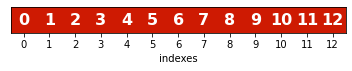

In [10]:
arr[::-1]

array([4, 5, 6, 7, 8])

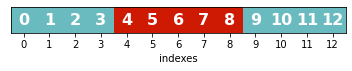

In [24]:
arr[4:9]

array([ 2,  5,  8, 11])

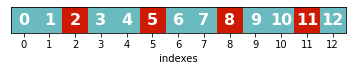

In [25]:
arr[2::3]

In [11]:
arr = np.arange(16).reshape(-1, 4).view(type=sp)

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

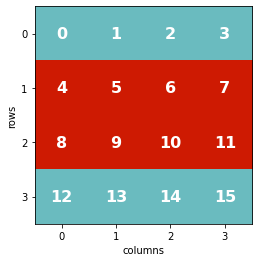

In [14]:
arr[1:3]

array([[ 1,  3],
       [ 5,  7],
       [ 9, 11],
       [13, 15]])

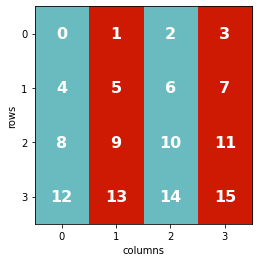

In [28]:
arr[:, 1::2]

array([[ 0,  2],
       [ 8, 10]])

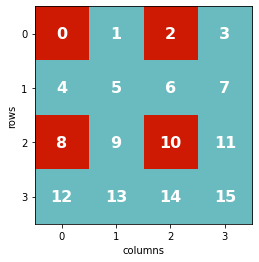

In [35]:
arr[::2, ::2]

In [15]:
arr = np.arange(3*4*4).reshape(3,4,4).view(type=sp3)

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[32, 33, 34, 35],
        [40, 41, 42, 43]]])

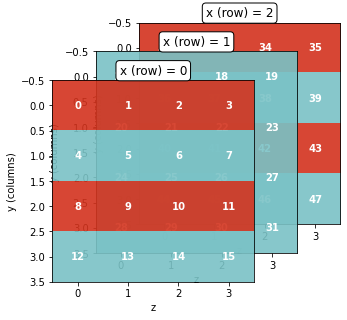

In [16]:
arr[::2, ::2]

In [17]:
import matplotlib.pyplot as plt

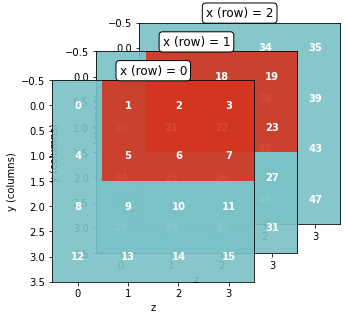

In [34]:
arr[:-1, :-2, -3:]
plt.savefig('dimension_slice_0.png', bbox_inches='tight')

## Задание

Сгенерировать массив и выбрать указанные элементы:

![slice_task](slice_task.png)

array([[22, 23],
       [12, 13],
       [ 2,  3]])

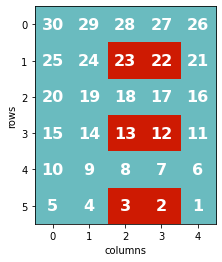

In [23]:
np.arange(30, 0, -1).reshape(6, 5).view(type=sp)[1::2, 3:1:-1]